In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly as py
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Practice data/crop_production.csv')

In [4]:
df.head(1)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0


In [5]:
# converting data type to its suitable format

df = df.infer_objects()

In [6]:
# checking shape of dataset

df.shape

(246091, 7)

In [7]:
# To describe the data set

df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


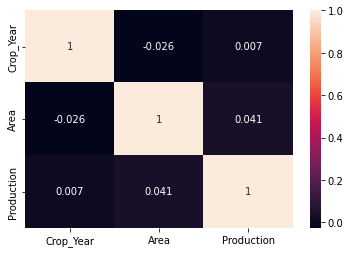

In [8]:
# checking correlation between variables

plt.tick_params(labelsize = 10)
sns.heatmap(df.corr(),annot=True)

We cannot see any high correlation between variables

In [9]:
# Counting unique states and districts

df[['District_Name', 'State_Name']].nunique()

District_Name    646
State_Name        33
dtype: int64

There are 33 states and 646 districts in the dataset.
Note:- UTs are also counted as states

In [10]:
#checking null values

df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [11]:
#Counting null %age

df['Production'].isnull().sum()/df['Production'].count()*100

1.5390264935365014

There are 3730 null values in Production column

In [12]:
# dropping null values as if we compare the whole dataset null values are less than 5% so there will not be very high impact on the results

df.dropna(inplace=True, axis=0)

In [13]:
#checking production by State

State_pro = df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(State_pro,x='State_Name',y='Production')

# **Kerala is highest crop producing state**

In [14]:
#checking production by District

Year_pro = df.groupby("District_Name",axis=0)['Production'].sum().reset_index().sort_values(by='Production').head(20)
px.bar(Year_pro,x='District_Name',y='Production',text='Production',color='District_Name')

**Kozhikode is highest crop producing state**

In [15]:
#checking production by Year

Year_pro = df.groupby("Crop_Year",axis=0)['Production'].sum().reset_index().sort_values(by='Production')
px.bar(Year_pro,x='Crop_Year',y='Production',color='Crop_Year',text='Production')

**2011 was the year when India did it's highest crop production**

In [28]:
#aggregating and ploting crop production season wise

seas_pro = df.groupby("Season",axis=0)['Production'].sum().reset_index().sort_values(by='Production')
px.bar(seas_pro,x='Season',y='Production', color='Season',text='Production')

**We have very less seasonal crops that is why whole year is on the top**

In [18]:
#aggregating and ploting crop production crop wise

Crop_pro = df.groupby("Crop",axis=0)['Production'].agg('count').reset_index().sort_values(by='Production')

fig = px.bar(Crop_pro, y='Production',color='Production')

fig.show()

**Rice and maize are top 2 crops**

In [19]:
#checking crop production

top_crop_pro = df.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False).head()
top_crop_pro

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


We have sorted top 5 crops by production we will check some one by one

[Text(0.5, 1.0, 'Sugarcane production by Season')]

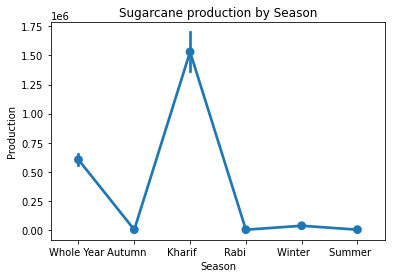

In [20]:
Sug_crop_pro = df[df["Crop"]=="Sugarcane"]
Sug_crop_pro.head(5)
sns.pointplot(data=Sug_crop_pro, x="Season",y="Production",dodge=True).set(title='Sugarcane production by Season')

[Text(0.5, 1.0, 'Rice production by Season')]

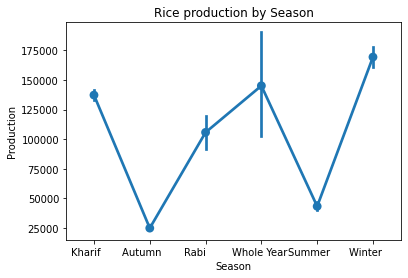

In [21]:
Rice_crop_pro = df[df["Crop"]=="Rice"]
Rice_crop_pro.head(5)
sns.pointplot(data=Rice_crop_pro, x="Season",y="Production",dodge=True).set(title='Rice production by Season')

[Text(0.5, 1.0, 'Potato production by Season')]

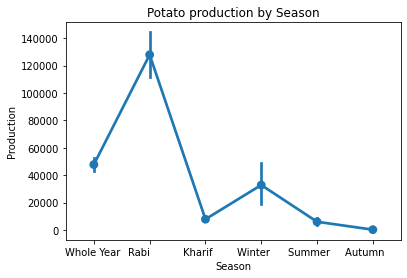

In [22]:
Potato_crop_pro = df[df["Crop"]=="Potato"]
Potato_crop_pro.head(5)
sns.pointplot(data=Potato_crop_pro, x="Season",y="Production",dodge=True).set(title='Potato production by Season')

[Text(0.5, 1.0, 'Coconut production by Season')]

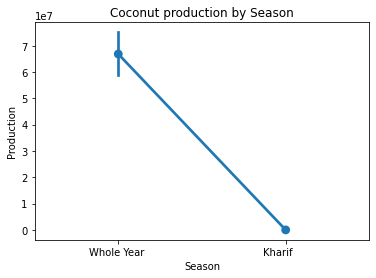

In [23]:
Coco_crop_pro = df[df["Crop"]=='Coconut ']
Potato_crop_pro.head(5)
sns.pointplot(data=Coco_crop_pro, x="Season",y="Production",dodge=True).set(title='Coconut production by Season')

[Text(0.5, 1.0, 'Wheat production by Season')]

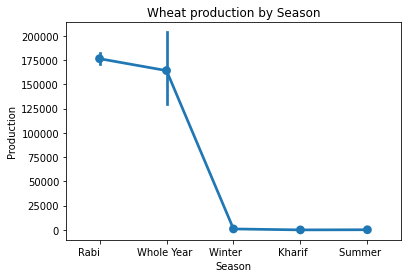

In [24]:
Wheat_crop_pro = df[df["Crop"]=='Wheat']
Potato_crop_pro.head(5)
sns.pointplot(data=Wheat_crop_pro, x="Season",y="Production",dodge=True).set(title='Wheat production by Season')

Insights:

*   Sugercane production is high in Kharif
*   Rice production is high in winter
*   Potato production is high in Rabi
*   Coconut production is high in whole year
*   Wheat production is high in Rabi

**Coconut is high in all seasons because it is not seasonal crop grows on a tree hence it is produced whole year.**

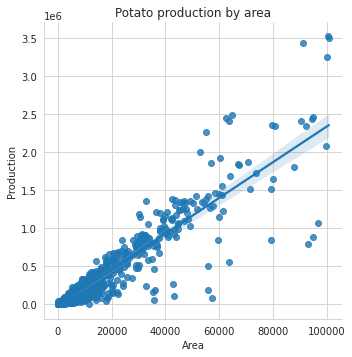

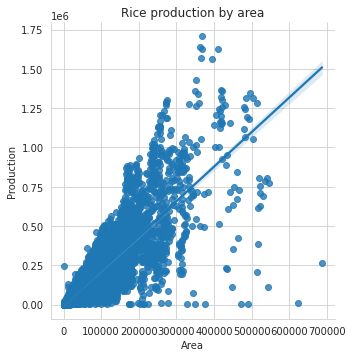

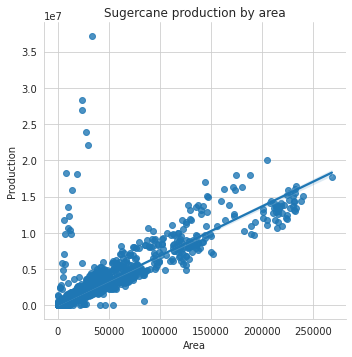

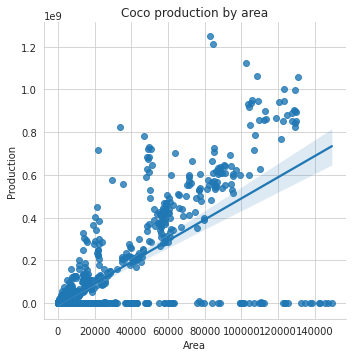

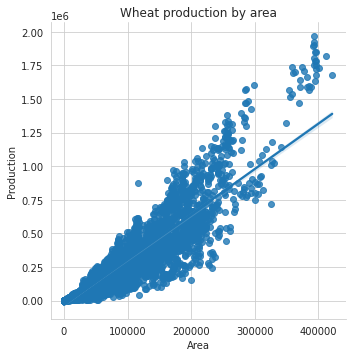

In [25]:
sns.set_style('whitegrid')
sns.lmplot(data=Potato_crop_pro, y="Production",x="Area").set(title='Potato production by area')
sns.lmplot(data=Rice_crop_pro, y="Production",x="Area").set(title='Rice production by area')
sns.lmplot(data=Sug_crop_pro, y="Production",x="Area").set(title='Sugercane production by area')
sns.lmplot(data=Coco_crop_pro, y="Production",x="Area").set(title='Coco production by area')
sns.lmplot(data=Wheat_crop_pro, y="Production",x="Area").set(title='Wheat production by area')

**Any crop production depends upon the area suitable for farming. We can see in graphs production is increasing by Area size.**

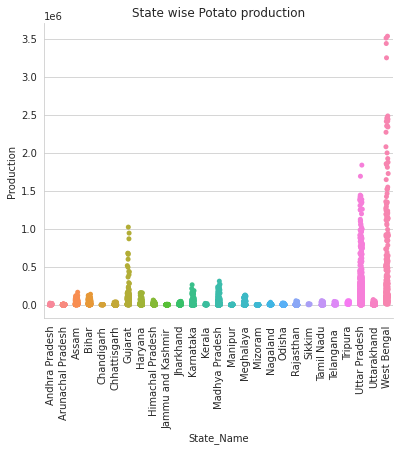

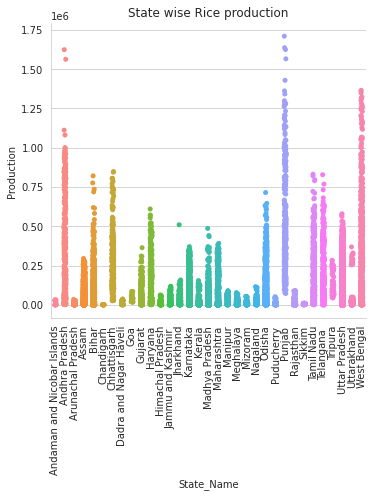

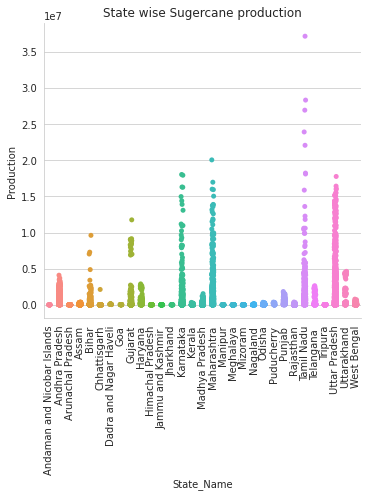

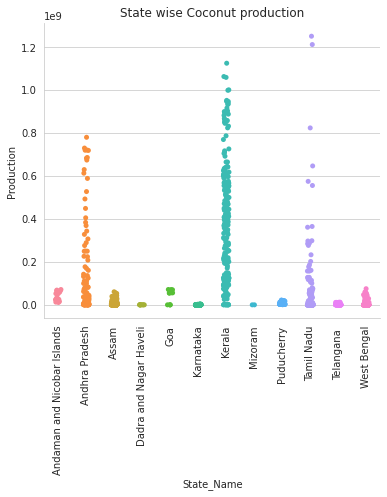

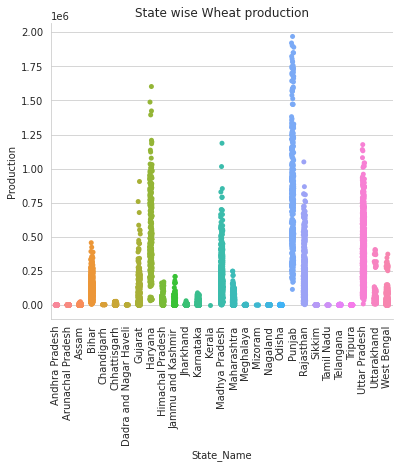

In [26]:
#State wise production
sns.catplot(data=Potato_crop_pro, x="State_Name",y="Production",height=5, aspect=1.2).set(title='State wise Potato production')
plt.xticks(rotation=90)
plt.show()
sns.catplot(data=Rice_crop_pro, x="State_Name",y="Production",height=5, aspect=1.2).set(title='State wise Rice production')
plt.xticks(rotation=90)
plt.show()
sns.catplot(data=Sug_crop_pro, x="State_Name",y="Production",height=5, aspect=1.2).set(title='State wise Sugercane production')
plt.xticks(rotation=90)
plt.show()
sns.catplot(data=Coco_crop_pro, x="State_Name",y="Production",height=5, aspect=1.2).set(title='State wise Coconut production')
plt.xticks(rotation=90)
plt.show()
sns.catplot(data=Wheat_crop_pro, x="State_Name",y="Production",height=5, aspect=1.2).set(title='State wise Wheat production')
plt.xticks(rotation=90)
plt.show()

**We see that coconut is mostly produced in south part of India this is because coconut requires hot and humid temperature. North indian atmosphere is not suitable for coconut production**